In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings

# 1. SETUP & DATA LOADING
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(style="whitegrid")

In [3]:
# Load the dataset
df = pd.read_csv('Regulatory Affairs of Road Accident Data 2020 India.csv')
df.dropna(subset=['Count'], inplace=True)

In [4]:
# 2. DATA CLEANING & PREPROCESSING
# The dataset repeats city totals for every cause category. 
# We create a 'City Summary' by filtering one category to avoid overcounting city totals.
city_summary = df[df['Cause category'] == 'Traffic Violation'].pivot_table(
    index='Million Plus Cities', 
    columns='Outcome of Incident', 
    values='Count', 
    aggfunc='sum'
).reset_index()

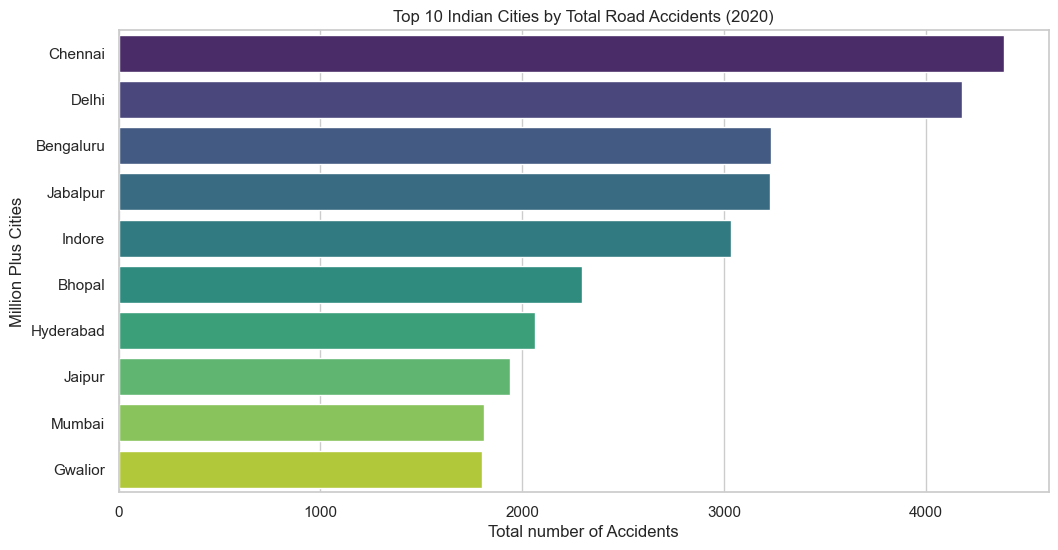

In [5]:
# 3. EXPLORATORY DATA ANALYSIS (EDA) - VISUALIZATIONS

# A. Top 10 Cities with Highest Accidents
plt.figure(figsize=(12, 6))
top_accidents = city_summary.sort_values('Total number of Accidents', ascending=False).head(10)
sns.barplot(data=top_accidents, x='Total number of Accidents', y='Million Plus Cities', palette='viridis')
plt.title('Top 10 Indian Cities by Total Road Accidents (2020)')
plt.show()

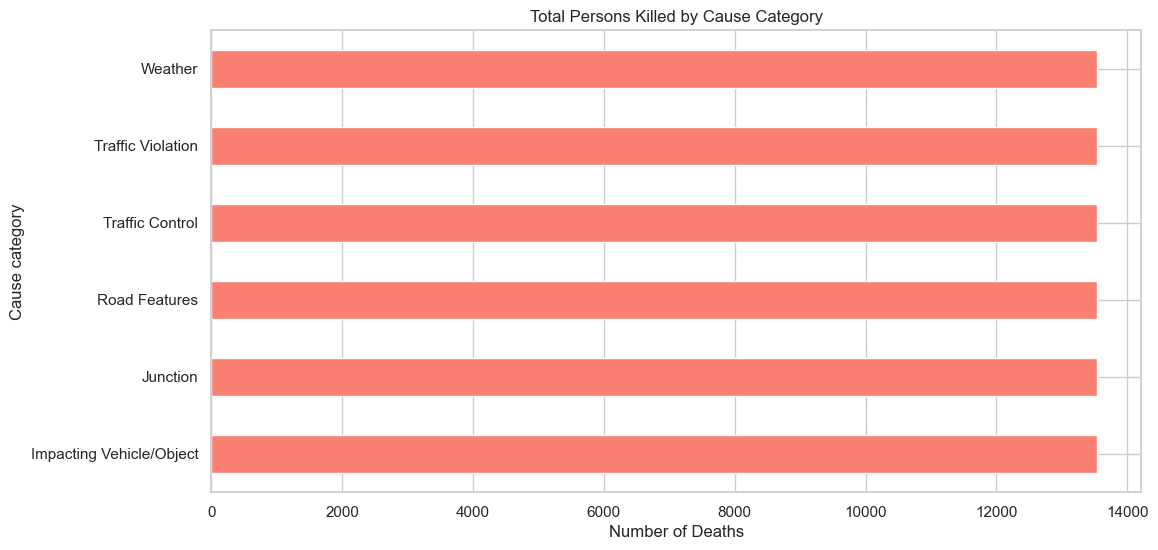

In [6]:
# B. Fatality Analysis by Cause Category
plt.figure(figsize=(12, 6))
cause_fatality = df[df['Outcome of Incident'] == 'Persons Killed'].groupby('Cause category')['Count'].sum().sort_values()
cause_fatality.plot(kind='barh', color='salmon')
plt.title('Total Persons Killed by Cause Category')
plt.xlabel('Number of Deaths')
plt.show()

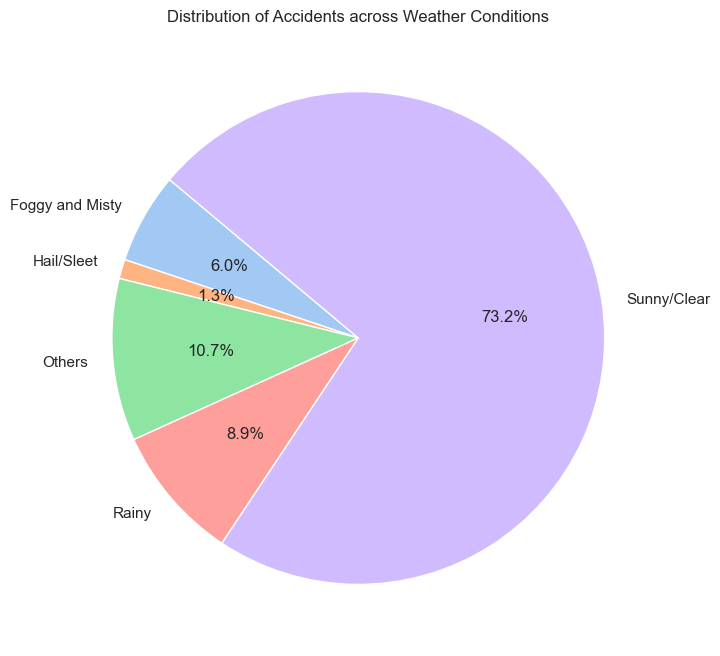

In [16]:
# C. Weather Impact
plt.figure(figsize=(8, 8))
weather_data = df[df['Cause category'] == 'Weather'].groupby('Cause Subcategory')['Count'].sum()
weather_data.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Accidents across Weather Conditions')
plt.ylabel('')
plt.show()

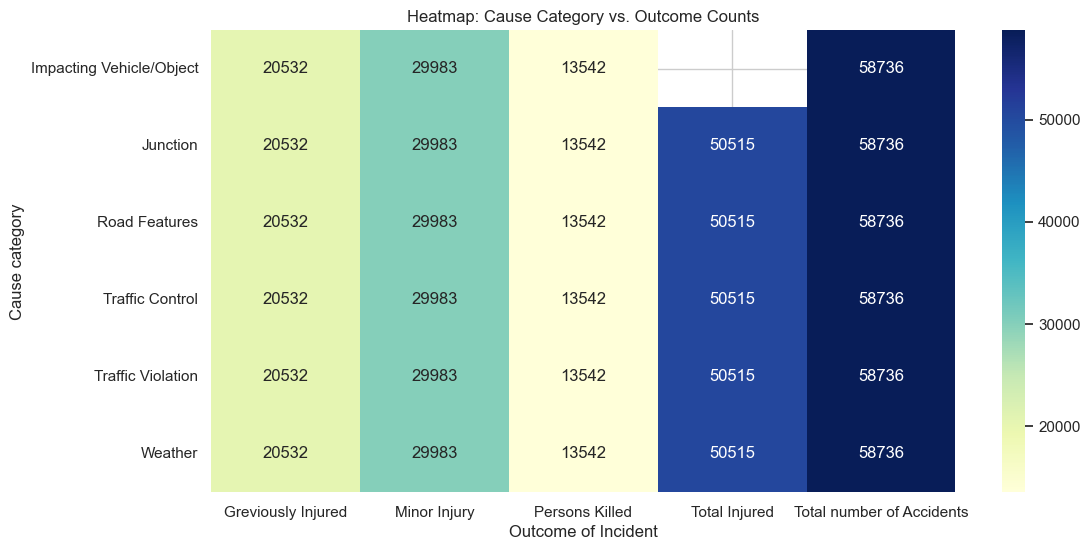

In [18]:

# A. Heatmap of Causes vs Outcomes
# This shows which causes lead to which types of injuries/deaths
pivot_table = df.pivot_table(index='Cause category', columns='Outcome of Incident', values='Count', aggfunc='sum')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Heatmap: Cause Category vs. Outcome Counts')
plt.show()

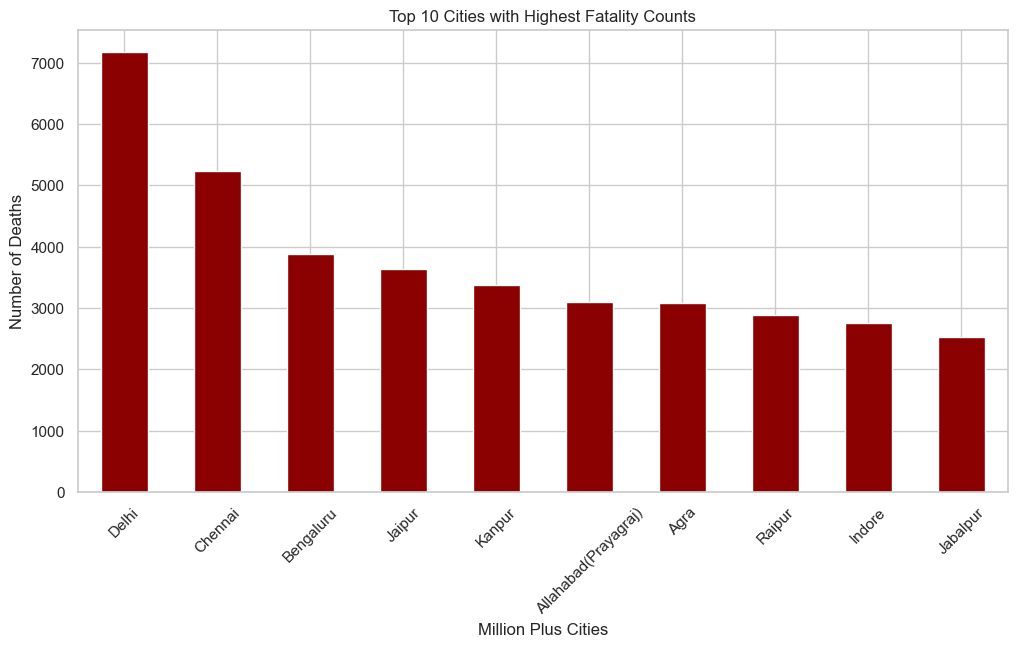

In [19]:
# B. Top 10 Lethal Cities (Highest Death Rate)
city_deaths = df[df['Outcome of Incident'] == 'Persons Killed'].groupby('Million Plus Cities')['Count'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
city_deaths.plot(kind='bar', color='darkred')
plt.title('Top 10 Cities with Highest Fatality Counts')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.show()

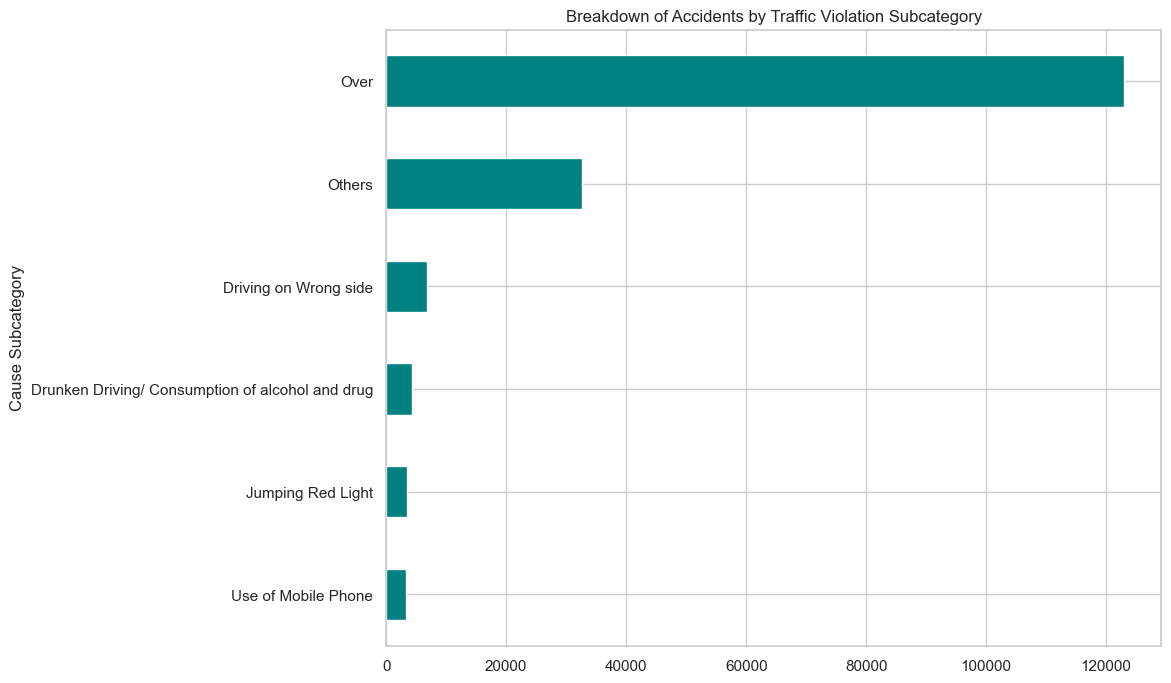

In [20]:
# C. Detailed Subcategory Analysis for "Traffic Violations"
violation_details = df[df['Cause category'] == 'Traffic Violation'].groupby('Cause Subcategory')['Count'].sum().sort_values()
plt.figure(figsize=(10, 8))
violation_details.plot(kind='barh', color='teal')
plt.title('Breakdown of Accidents by Traffic Violation Subcategory')
plt.show()

In [8]:
# 4. MACHINE LEARNING (Correlation & Regression)
# Objective: Predict 'Persons Killed' based on 'Total number of Accidents'

In [9]:
X = city_summary[['Total number of Accidents']]
y = city_summary['Persons Killed']

In [10]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


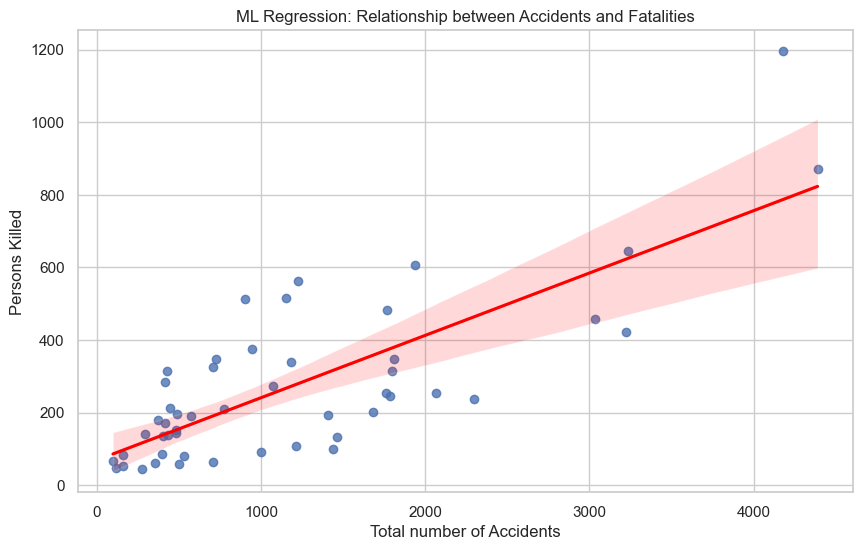

In [12]:
# Visualization of Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(x='Total number of Accidents', y='Persons Killed', data=city_summary, line_kws={"color": "red"})
plt.title('ML Regression: Relationship between Accidents and Fatalities')
plt.show()

In [13]:
# Model Accuracy
print(f"Model R-squared Score: {model.score(X_test, y_test):.4f}")

Model R-squared Score: 0.2691


In [14]:
# 5. FINAL SUMMARY STATISTICS
print("\n--- Project Summary ---")
print(f"Total Accidents Reported: {city_summary['Total number of Accidents'].sum()}")
print(f"Total Fatalities Reported: {city_summary['Persons Killed'].sum()}")
print(f"City with most accidents: {top_accidents.iloc[0]['Million Plus Cities']}")


--- Project Summary ---
Total Accidents Reported: 58736.0
Total Fatalities Reported: 13542.0
City with most accidents: Chennai
